<a href="https://colab.research.google.com/github/layanbuirat/ENCS5141-INTELLIGENT-S-ENCO-COMPUTER-ENGINEERING---YSTEMS-LAB---/blob/main/Supervised_Learning_EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1211439:ID ........Leyan Buriat ❤
Experiment 4 - Supervised Learning

In this experiment, we will explore supervised learning techniques for regression and
classification tasks. We will use Python and the Scikit-learn library to implement
linear regression, polynomial regression, random forest classifier, and SVM models.
We will also evaluate the models using appropriate evaluation measures.
Scikit-learn installation
To install the Scikit-learn library, you can use the following command
$ pip install -U scikit-**learn** **bold text**

In order to check your installation you can use
$ python -m pip show scikit-learn # to see which version and where
scikit-learn is installed
$ python -m pip freeze # to see all packages installed in the active
virtualenv
$ python -c "import sklearn; sklearn.show_versions()"
Note that in order to avoid potential conflicts with other packages it is strongly
recommended to use a virtual environment (venv) or a conda environment.

1.1 Regression
Regression is a statistical technique that relates a continuous dependent variable to
one or more independent variables. In this part, we will fit different regression models
on a toy dataset.
1.1.1 Generating examples
We will start by generating a toy dataset. Generate 40 examples using the following
function

f(x) = sin(x) + ε,

where ε is sampled from a normal distribution with standard deviation 0.1, and
x ∈ [0, 1). Split the samples to into two equal sets: training set, and testing set.

Listing 1.1: Generating examples.

In [3]:
import numpy as np
def true_fun(X):
      return np.sin(1.5 * np.pi * X)
np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

Plot both the training and testing examples in a scatter plot and show the true
function curve for the range [0, 1).

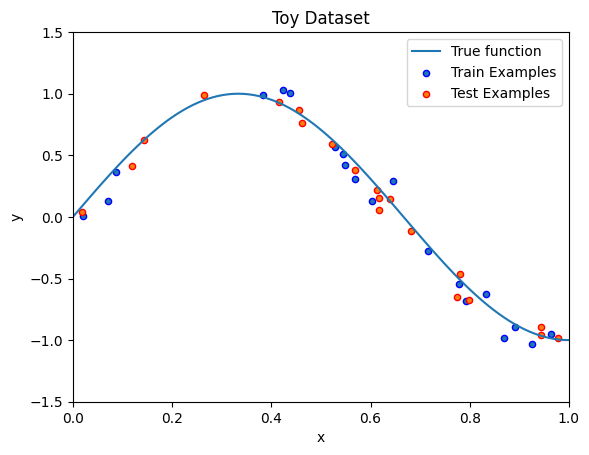

In [4]:
#Listing 1.2: Plotting the dataset.
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

You should get a figure similar to Figure 1.1
1.1.2 Linear regression
Let’s begin with a simple linear regression model. I.e., we will fit a line to the training
set of the form

h(x) = wo + w1x,

where x is the input feature, w0 is the intercept of the fitted line, and w1 is its slope.
We will use the linear regression implementation from sklearn to get our model. Plot
the fitted line.

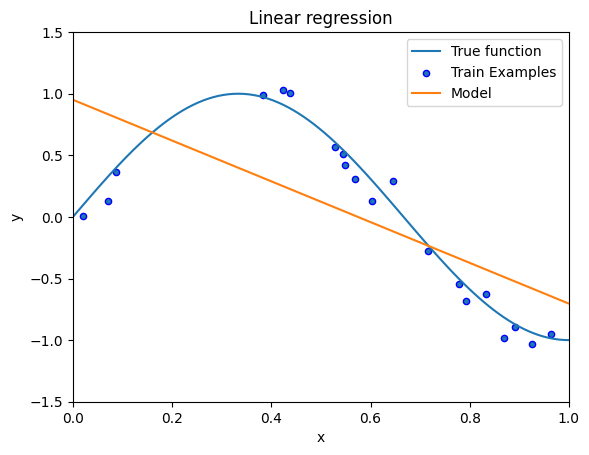

In [5]:
#Listing 1.3: Linear regression.
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

Task 1: Compute the mean squared error of the learned linear model on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error

# توقع القيم على مجموعة الاختبار
y_pred = linear_regression.predict(X_test[:, np.newaxis])

# حساب MSE
mse = mean_squared_error(y_test, y_pred)

print("خطأ المتوسط التربيعي (MSE) على مجموعة الاختبار:", mse)


1.1.3 Polynomial regression
The linear model we got in the previous part is too simple to explain the data. In
this part we will use more complex models. Let’s start with a quadratic function of
the form

h(x) = wo + w1x + w2x
2
,

To get the non-linear basis functions for the quadratic model, we will use Polyno-
mialFeatures from sklearn

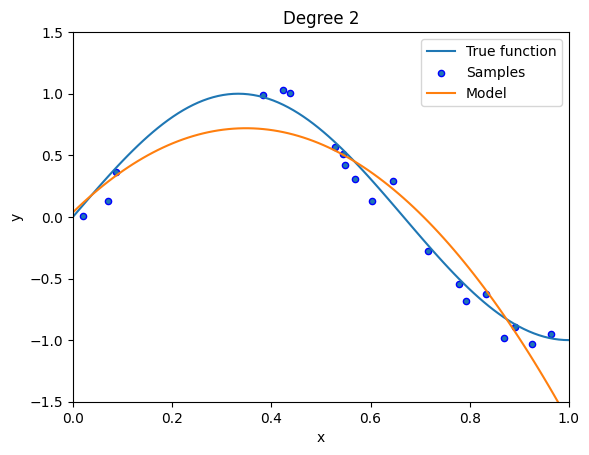

In [7]:
#Listing 1.4: Quadratic model.
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]),
y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:,
np.newaxis])), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

Task 2: Repeat the previous part with polynomials with degree 4 and 15.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# درجة متعدد الحدود 4
poly_4 = PolynomialFeatures(degree=4)
X_train_poly_4 = poly_4.fit_transform(X_train[:, np.newaxis])
X_test_poly_4 = poly_4.transform(X_test[:, np.newaxis])

# تدريب النموذج متعدد الحدود بدرجة 4
linear_regression_4 = LinearRegression()
linear_regression_4.fit(X_train_poly_4, y_train)

# توقع القيم على مجموعة الاختبار
y_pred_4 = linear_regression_4.predict(X_test_poly_4)

# حساب MSE للنموذج متعدد الحدود بدرجة 4
mse_4 = mean_squared_error(y_test, y_pred_4)

# درجة متعدد الحدود 15
poly_15 = PolynomialFeatures(degree=15)
X_train_poly_15 = poly_15.fit_transform(X_train[:, np.newaxis])
X_test_poly_15 = poly_15.transform(X_test[:, np.newaxis])

# تدريب النموذج متعدد الحدود بدرجة 15
linear_regression_15 = LinearRegression()
linear_regression_15.fit(X_train_poly_15, y_train)

# توقع القيم على مجموعة الاختبار
y_pred_15 = linear_regression_15.predict(X_test_poly_15)

# حساب MSE للنموذج متعدد الحدود بدرجة 15
mse_15 = mean_squared_error(y_test, y_pred_15)

# طباعة MSE لكل نموذج
print("MSE للنموذج متعدد الحدود بدرجة 4:", mse_4)
print("MSE للنموذج متعدد الحدود بدرجة 15:", mse_15)


MSE للنموذج متعدد الحدود بدرجة 4: 0.004641799299812718
MSE للنموذج متعدد الحدود بدرجة 15: 503.6525031549251


Task 3: Compute the mean squared error of the learned models on the test set. Which
model is the best?

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# نموذج الانحدار الخطي (Linear Regression)
linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)
y_pred_linear = linear_regression.predict(X_test[:, np.newaxis])

# حساب MSE للنموذج الخطي
mse_linear = mean_squared_error(y_test, y_pred_linear)

# درجة متعدد الحدود 4
poly_4 = PolynomialFeatures(degree=4)
X_train_poly_4 = poly_4.fit_transform(X_train[:, np.newaxis])
X_test_poly_4 = poly_4.transform(X_test[:, np.newaxis])

# تدريب النموذج متعدد الحدود بدرجة 4
linear_regression_4 = LinearRegression()
linear_regression_4.fit(X_train_poly_4, y_train)
y_pred_4 = linear_regression_4.predict(X_test_poly_4)

# حساب MSE للنموذج متعدد الحدود بدرجة 4
mse_4 = mean_squared_error(y_test, y_pred_4)

# درجة متعدد الحدود 15
poly_15 = PolynomialFeatures(degree=15)
X_train_poly_15 = poly_15.fit_transform(X_train[:, np.newaxis])
X_test_poly_15 = poly_15.transform(X_test[:, np.newaxis])

# تدريب النموذج متعدد الحدود بدرجة 15
linear_regression_15 = LinearRegression()
linear_regression_15.fit(X_train_poly_15, y_train)
y_pred_15 = linear_regression_15.predict(X_test_poly_15)

# حساب MSE للنموذج متعدد الحدود بدرجة 15
mse_15 = mean_squared_error(y_test, y_pred_15)

# طباعة MSE لكل نموذج
print("MSE للنموذج الخطي:", mse_linear)
print("MSE للنموذج متعدد الحدود بدرجة 4:", mse_4)
print("MSE للنموذج متعدد الحدود بدرجة 15:", mse_15)

# تحديد النموذج الأفضل
mse_dict = {'Linear Regression': mse_linear, 'Degree 4 Polynomial': mse_4, 'Degree 15 Polynomial': mse_15}
best_model = min(mse_dict, key=mse_dict.get)

print(f"النموذج الأفضل هو: {best_model} مع MSE = {mse_dict[best_model]}")


MSE للنموذج الخطي: 0.1736489094130998
MSE للنموذج متعدد الحدود بدرجة 4: 0.004641799299812718
MSE للنموذج متعدد الحدود بدرجة 15: 503.6525031549251
النموذج الأفضل هو: Degree 4 Polynomial مع MSE = 0.004641799299812718


1.2 Classification
Classifications is a supervised learning task where the goal is to predict a categorical
(discrete) target label. In this part we will experiment with random forests and SVM
classifiers on a toy dataset.
1.2.1 Generating examples
In this part, we will generate a toy dataset for classification. We are going to use the
make classification function from sklearn to generate the data and then split them
into training and testing sets using train test split.
Run the following code to generate and visualize the dataset.

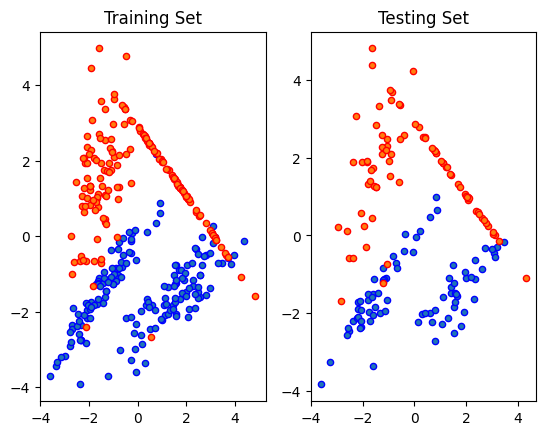

In [11]:
#Listing 1.5: Toy dataset for classification.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=500, n_features=2, n_classes=2,

n_informative=2, n_redundant=0,
n_clusters_per_class=2, random_state=0,
shuffle=True, class_sep=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.33, random_state=0)

colors = ["b", "r"]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Training Set")
ax2.set_title("Testing Set")
for c in np.unique(y_train):
  ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,
        [X_train[i, 1] for i in np.where(y_train==c)],
        edgecolor=colors[c], s=20, label="Samples")
  ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] ,
        [X_test[i, 1] for i in np.where(y_test==c)],
        edgecolor=colors[c], s=20, label="Samples")


1.2.2 Classification with random forests
A random forest is an ensemble model that fits a number of decision tree classifiers
on various sub-samples of the dataset. Each tree is trained on a bootstrap samples of
the training set to introduce randomness in the trees. Furthermore, when selecting
a feature for a test node during tree construction, only a subset of the features is
considered for the candidate tests. The final prediction in random forests is usually
obtained by averaging predictions from all trees.
Let’s start by testing a random forest of 2 trees on the dataset we generated in
the previous section. The following code trains a random forest on the training set
and prints both the training and testing accuracy.

In [12]:
#Listing 1.6: Random forest classifier.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2,
                             criterion="entropy",
                             max_features="sqrt", max_samples=.8,
                             random_state=0)

clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


For classification, accuracy is not the only used metrics. There are many other
metrics such as precision, recall, F1-score, ...etc. All of these metrics can be derived
form the the confusion matrix. The following code computes the confusion matrix
for the random forest trained in the previous part.

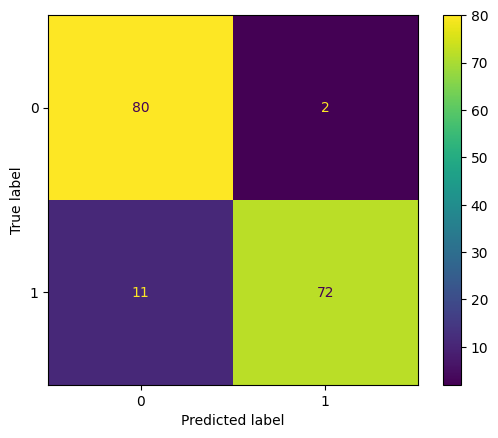

In [13]:
#Listing 1.7: Confusion Matrix.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()

Task 4: In the previous example, compute the precision, recall, F1-score. Discuss
when accuracy is not the most suitable metric.

Precision: 0.972972972972973
Recall: 0.8674698795180723
F1-score: 0.9171974522292995


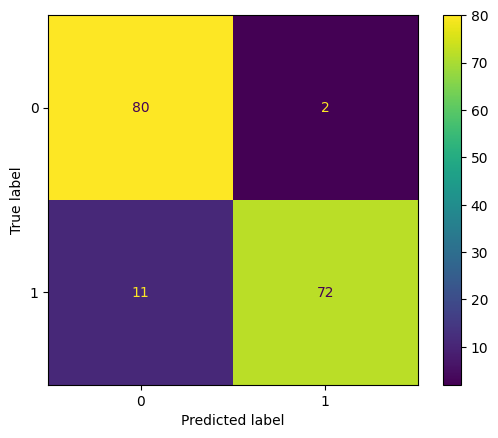

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import numpy as np

# حساب التنبؤات من النموذج
y_pred = clf.predict(X_test)

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)

# عرض مصفوفة الارتباك
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# حساب Precision, Recall, F1-score باستخدام مصفوفة الارتباك
# للحصول على القيم من مصفوفة الارتباك:
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

# حساب Precision, Recall, F1-score
precision = TP / (TP + FP)  # Precision = TP / (TP + FP)
recall = TP / (TP + FN)  # Recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)  # F1 = 2 * (precision * recall) / (precision + recall)

# طباعة النتائج
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


متى لا تكون الدقة (Accuracy) هي المقياس الأكثر ملاءمة؟
الدقة قد لا تكون المقياس الأنسب في الحالات التالية:

الفئات غير المتوازنة: إذا كان لدينا تصنيف غير متوازن (على سبيل المثال، إذا كانت الغالبية العظمى من البيانات تنتمي إلى فئة واحدة)، فإن النموذج قد يتنبأ دائمًا بالفئة الغالبة ويحقق دقة عالية ولكن مع أداء ضعيف في الفئات الأقل تكرارًا.
التركيز على فئة معينة: في بعض الحالات، قد تكون فئة معينة هي الأهم (مثل التنبؤ بالمرض في حالة طبية)، وبالتالي يجب الانتباه إلى مقياسي الدقة و الاسترجاع بدلًا من الدقة فقط.
التركيز على التوازن بين الدقة والاسترجاع: في حالة الأغراض المهمة مثل تحديد الإيجابيات الكاذبة أو السلبيات الكاذبة (كما في التطبيقات الأمنية أو الطبية)، يجب استخدام F1-score لأنه يعطينا متوسطًا متناغمًا بين الدقة والاسترجاع

Task 5: Train different random forests by changing the number of trees from 2 to 15.
Plot the training and testing accuracy of the trained models vs the number of trees.
What do you notice?

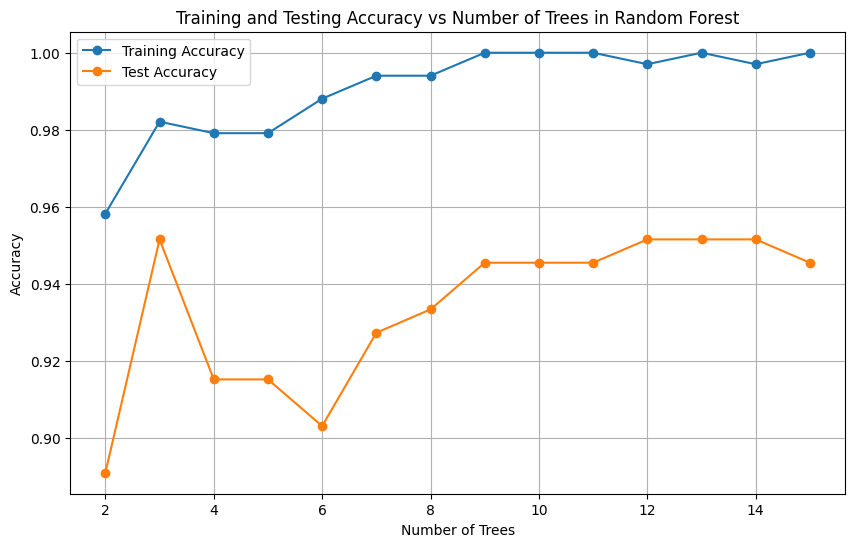

In [18]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# قائمة لتخزين الدقة لكل عدد من الأشجار
train_accuracies = []
test_accuracies = []

# تغيير عدد الأشجار من 2 إلى 15
for n_trees in range(2, 16):
    # تدريب نموذج Random Forest مع عدد الأشجار المحدد
    clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    clf.fit(X_train, y_train)

    # حساب دقة التدريب
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    train_accuracies.append(train_accuracy)

    # حساب دقة الاختبار
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    test_accuracies.append(test_accuracy)

# رسم دقة التدريب والاختبار مقابل عدد الأشجار
plt.figure(figsize=(10, 6))
plt.plot(range(2, 16), train_accuracies, label="Training Accuracy", marker='o')
plt.plot(range(2, 16), test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy vs Number of Trees in Random Forest")
plt.legend()
plt.grid(True)
plt.show()


Decision Surface
Decision surface is a plot that shows how a machine learning model divides the feature
space to different class labels. The following code visualizes the decision surface of
our random forest model in the previous example. The result should be similar to
Figure 1.5

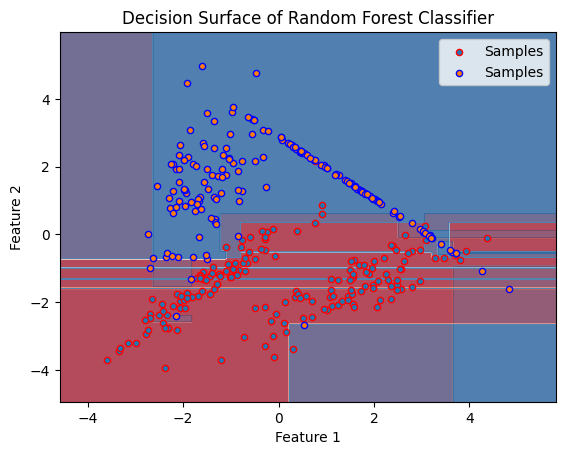

In [19]:
#Listing 1.8: Decision Surface
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

# تعريف الألوان
cmap = plt.cm.RdBu
plot_step = 0.02  # خطوة دقيقة لحدود قرار الرسم

# إنشاء نموذج Random Forest مع 2 شجرة
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
                             max_features="sqrt", max_samples=0.8,
                             random_state=0)

# تدريب النموذج
clf.fit(X_train, y_train)

# تحديد الحدود للرسم باستخدام شبكة دقيقة
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)

# تعيين الشفافية لكل شجرة من الأشجار
estimator_alpha = 1.0 / len(clf.estimators_)

# رسم الحدود باستخدام الأشجار المدربة
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

# تحديد الألوان للفئات
colors = ["r", "b"]

# رسم العينات التدريبية
for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Surface of Random Forest Classifier')
plt.legend()
plt.show()


Task 6: Draw the decision surface for a set of random forests with different number
of trees. Do you notice any pattern?

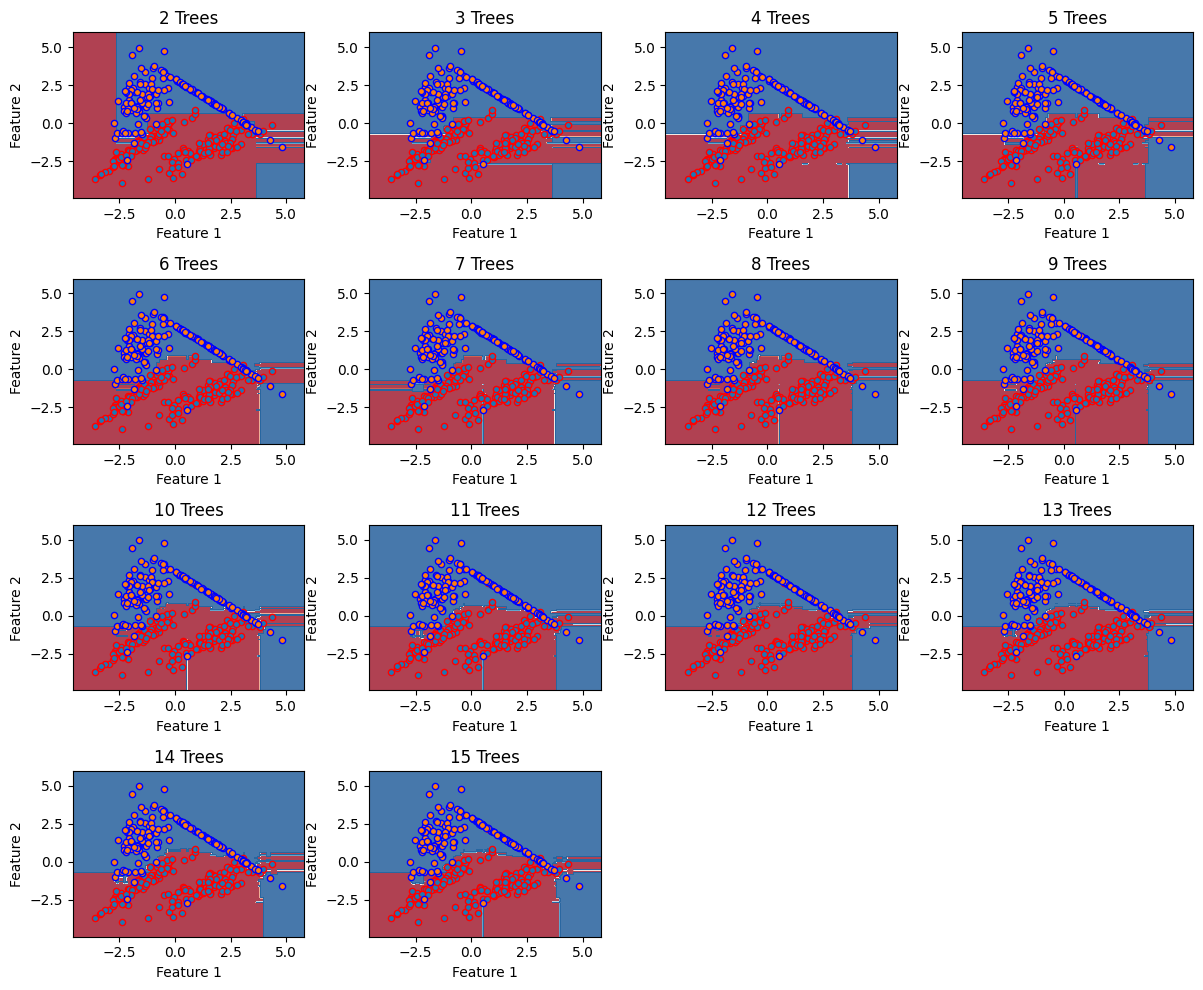

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

# إعدادات الرسم
cmap = plt.cm.RdBu
plot_step = 0.02  # دقة خطوة الرسم

# تحديد نطاقات للعرض
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# رسم القرار لعدة نماذج Random Forest مع عدد متزايد من الأشجار
plt.figure(figsize=(12, 10))

for n_trees in range(2, 16):  # من 2 إلى 15 شجرة
    clf = RandomForestClassifier(n_estimators=n_trees, criterion="entropy",
                                 max_features="sqrt", max_samples=0.8,
                                 random_state=0)
    clf.fit(X_train, y_train)

    # رسم الحدود للقرار لكل نموذج
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # رسم السطح الملون للقرار
    plt.subplot(4, 4, n_trees - 1)  # ترتيب الصور في شبكة 4x4
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # رسم العينات
    colors = ["r", "b"]
    for c in np.unique(y_train):
        plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                    [X_train[i, 1] for i in np.where(y_train == c)],
                    edgecolor=colors[c], s=20, label="Samples")

    plt.title(f"{n_trees} Trees")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


1.2.3 Classification with SVM
In this section, we will test another popular classifier, which is support vector machine
(SVM). SVM tries to find a separating hyper-plane between the classes with rthe
maximum margin. The following code trains an SVM classifier with linear kernel on
our toy dataset

In [20]:
#Listing 1.9: SVM classifier.

from sklearn import svm
clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


Task 7: Draw the decision surface for the SVM model in the previous example.

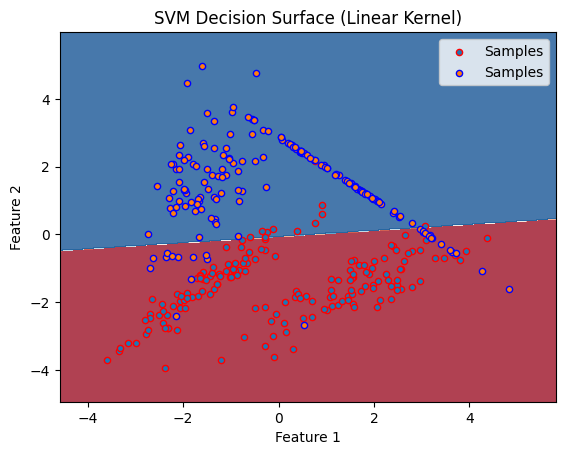

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

# إعدادات الرسم
cmap = plt.cm.RdBu
plot_step = 0.02  # دقة خطوة الرسم

# تحديد نطاقات للعرض
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# تدريب نموذج SVM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# رسم الحدود للقرار للنموذج SVM
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# رسم السطح الملون للقرار
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

# رسم العينات
colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")

plt.title('SVM Decision Surface (Linear Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Task 8: Train an SVM model with rbf kernel and draw its decision boundary. What
do you notice?


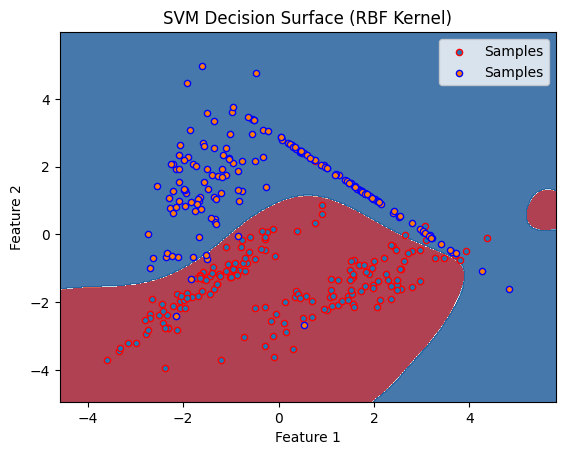

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# إعدادات الرسم
cmap = plt.cm.RdBu
plot_step = 0.02  # دقة خطوة الرسم

# تحديد نطاقات للعرض
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# تدريب نموذج SVM مع RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)  # gamma هو معامل انتشار الـ RBF
svm_rbf.fit(X_train, y_train)

# رسم الحدود للقرار للنموذج SVM مع RBF kernel
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# رسم السطح الملون للقرار
plt.contourf(xx, yy, Z_rbf, alpha=0.8, cmap=cmap)

# رسم العينات
colors = ["r", "b"]
for c in np.unique(y_train):
    plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                [X_train[i, 1] for i in np.where(y_train == c)],
                edgecolor=colors[c], s=20, label="Samples")

plt.title('SVM Decision Surface (RBF Kernel)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



Task 9: Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?

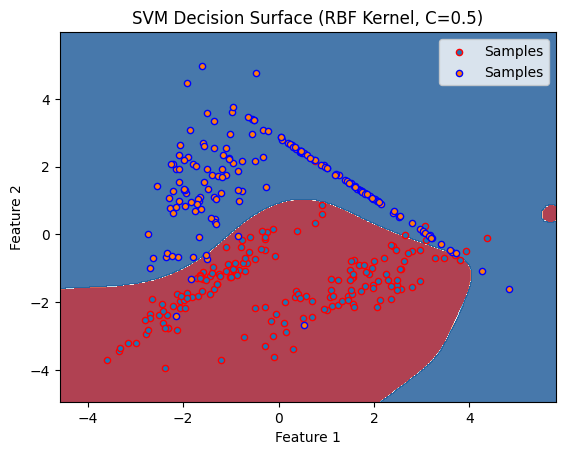

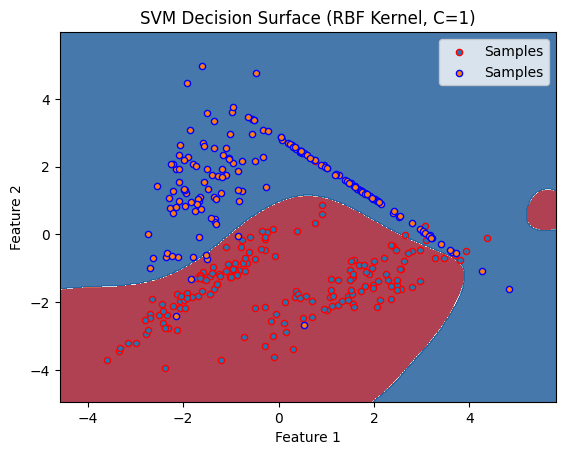

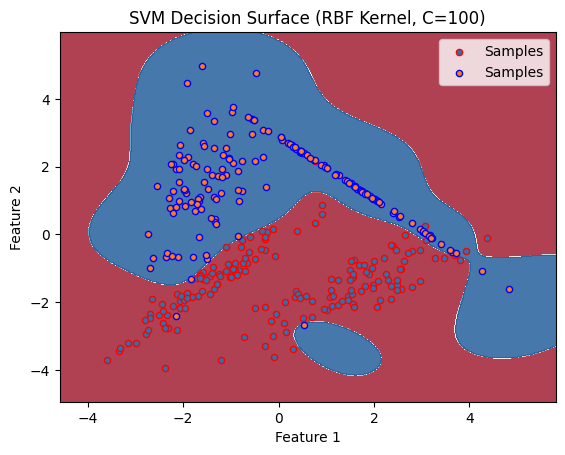

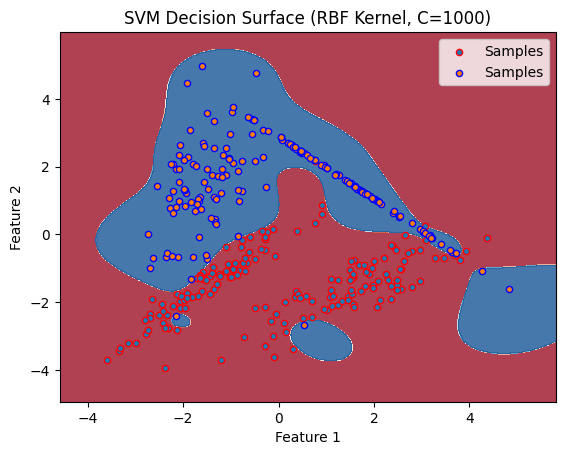

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# إعدادات الرسم
cmap = plt.cm.RdBu
plot_step = 0.02  # دقة خطوة الرسم

# تحديد نطاقات للعرض
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# القيم المختلفة لـ C
C_values = [0.5, 1, 100, 1000]

# رسم الحدود لكل قيمة C
for C in C_values:
    # تدريب نموذج SVM مع RBF Kernel وC مختلف
    svm_rbf = SVC(kernel='rbf', C=C, gamma=0.5)
    svm_rbf.fit(X_train, y_train)

    # رسم الحدود للقرار للنموذج SVM مع RBF kernel
    Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)

    # رسم السطح الملون للقرار
    plt.contourf(xx, yy, Z_rbf, alpha=0.8, cmap=cmap)

    # رسم العينات
    colors = ["r", "b"]
    for c in np.unique(y_train):
        plt.scatter([X_train[i, 0] for i in np.where(y_train == c)],
                    [X_train[i, 1] for i in np.where(y_train == c)],
                    edgecolor=colors[c], s=20, label="Samples")

    plt.title(f'SVM Decision Surface (RBF Kernel, C={C})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


1.3 Hyper-parameters selection
Hyper-parameters are parameters that are set before starting the training process
and not directly learnt within estimators. Typical examples include number of trees
and max depth in random forests, C and kernel for SVM ...etc.
To select hyper-parameters, usually we search the hyper-parameter space for the
best cross-validation score (or if the dataset is large enough, we could search for the
parameters with the best score on a validation set).

The following code use grid search with cross-validation to find the best hyper-
parameters for the SVM example in the previous section.

In [24]:
#Listing 1.10: Hyper-parameters selection.
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


Task 10: GridSearchCV has an attribute called cv results , which is a dict with
keys as column headers and values as columns. Print it and try to explain the values
that you get.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Create the model
svc = SVC(kernel='rbf')

# Set the parameters for GridSearch
param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': [0.1, 0.5, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Print cv_results_
print(grid_search.cv_results_)


{'mean_fit_time': array([0.00306039, 0.00318112, 0.00382237, 0.00736909, 0.00754662,
       0.00669365, 0.00674548, 0.01084065, 0.00578747, 0.00406065,
       0.00701556, 0.02197895, 0.01494069, 0.02484155, 0.02695575,
       0.02047715]), 'std_fit_time': array([9.43705672e-05, 2.11975791e-04, 2.67338888e-04, 1.08910078e-03,
       1.34865092e-03, 1.62373839e-03, 2.45648694e-03, 4.95967343e-03,
       2.83077298e-03, 1.52311394e-03, 3.08939315e-03, 4.80418171e-03,
       1.67280239e-02, 4.02577089e-03, 9.78005962e-03, 4.90273082e-03]), 'mean_score_time': array([0.00177112, 0.00181012, 0.00189114, 0.00275631, 0.00364428,
       0.00232263, 0.00354586, 0.00460305, 0.00558257, 0.0064157 ,
       0.00347052, 0.00455337, 0.00607872, 0.01171303, 0.01230593,
       0.00419407]), 'std_score_time': array([8.91158259e-05, 3.86495269e-05, 2.39650405e-05, 1.25791360e-04,
       1.56787328e-03, 9.86553430e-04, 1.62412852e-03, 4.21742117e-03,
       3.17961698e-03, 4.61555170e-03, 3.61674827e-03, 3.